<a href="https://colab.research.google.com/github/xuyi0619/Past-work-of-statistical-analysis/blob/main/OLS%2CKNN%2CRidge%2CLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Regression on California Test Scores

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

In [ ]:
df.drop(["readscr", "mathscr"], axis=1)

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'count')

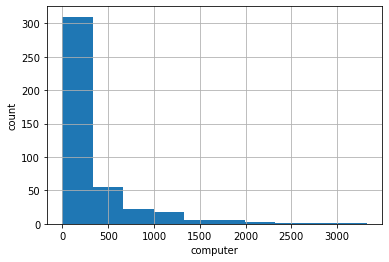

In [ ]:
df['computer'].hist()
plt.xlabel('computer')
plt.ylabel('count')

Text(0, 0.5, 'count')

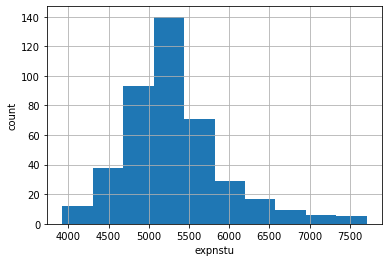

In [ ]:
df['expnstu'].hist()
plt.xlabel('expnstu')
plt.ylabel('count')

Text(0, 0.5, 'count')

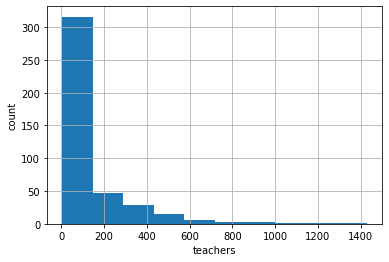

In [ ]:
df['teachers'].hist()
plt.xlabel('teachers')
plt.ylabel('count')

Text(0, 0.5, 'count')

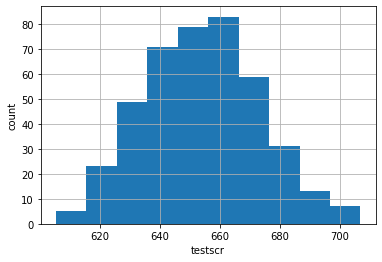

In [ ]:
df['testscr'].hist()
plt.xlabel('testscr')
plt.ylabel('count')

1.2 Visualize the dependency of the target on each feature from 1.1.

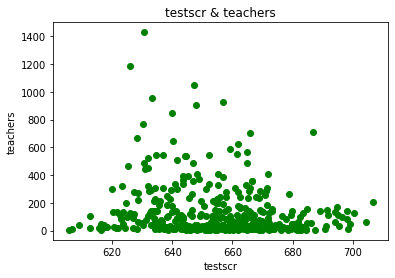

In [ ]:
plt.scatter('testscr','teachers', data = df, color='green',marker='o',linestyle='solid')

# add a title

plt.title("testscr & teachers")

# add a label to the x and y-axis
plt.ylabel("teachers")
plt.xlabel("testscr")

plt.show() # code to print out final chart

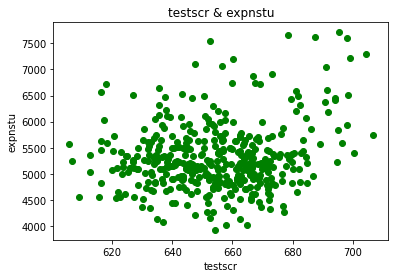

In [ ]:
plt.scatter('testscr','expnstu', data = df, color='green',marker='o',linestyle='solid')

# add a title

plt.title("testscr & expnstu")

# add a label to the x and y-axis
plt.ylabel("expnstu")
plt.xlabel("testscr")

plt.show() # code to print out final chart

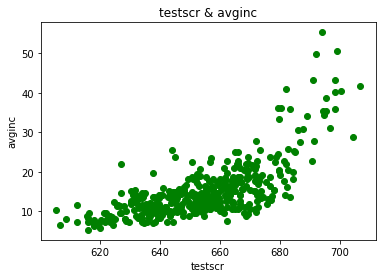

In [ ]:
plt.scatter('testscr','avginc', data = df, color='green',marker='o',linestyle='solid')

# add a title

plt.title("testscr & avginc")

# add a label to the x and y-axis
plt.ylabel("avginc")
plt.xlabel("testscr")

plt.show() # code to print out final chart

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [ ]:
# Delete extra variable that is not continuous
corrected_data = df.drop(df.columns[[16, 17]], axis=1) # remove the reading and math scores from the dataset
data = corrected_data.iloc[:, 5:] # delete first six columns

data.head()


,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


Ridge

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
y = data['testscr'] # median value of homes
X = data.loc[:, data.columns != 'testscr']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [ ]:
# Ridge without StandardScaler
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.78


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(ridge, X_train, y_train)))

0.799437694626568


In [ ]:
# Ridge w StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

print("ridge.coef_: {}".format(ridge.coef_))
print(X_train.columns)

Training set score: 0.81
Test set score: 0.78
Number of features used: 10
ridge.coef_: [ -3.25782421   2.07552379  -0.83812228 -10.70717001   1.16362824
   0.65193105   0.90096387  -0.15527316   4.78278413  -2.95491784]
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(ridge, X_train_scaled, y_train)))

0.8012177894175725


Lasso

In [ ]:
# Lasso without StandardScaler
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.78


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+03, tolerance: 1.175e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(np.mean(cross_val_score(lasso, X_train, y_train)))

0.799557382128512


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.729e+03, tolerance: 9.885e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.279e+03, tolerance: 9.498e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+03, tolerance: 8.647e+00

In [ ]:
# Lasso w StandardScaler
lasso = Lasso().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))
print(X_train.columns)

Training set score: 0.81
Test set score: 0.77
Number of features used: 5
lasso.coef_: [ -0.          -0.          -0.         -11.20849097  -0.
   0.32730272   0.22042943  -0.           4.51663096  -2.24580117]
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(lasso, X_train_scaled, y_train)))

0.7986712533383179


 Linear regression

In [ ]:
# Linear regression without StandardScaler
from sklearn.linear_model import LinearRegression
print(np.mean(cross_val_score(LinearRegression(), X_train, y_train)))

0.799900922435065


In [ ]:
# Linear regression w StandardScaler
print(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train)))

0.7999009224350647


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(X_train.columns)
print("lr.coef_: "+str(lr.coef_))

Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
lr.coef_: [ -7.91273221   6.74669513  -0.78189225 -10.89893161   1.08518268
   0.66762892   0.94432931   0.03332241   4.69232357  -2.87292334]


KNN

In [ ]:
# KNN without StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#Print accuracy
print("accuracy:"+str(
np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train))))



accuracy:-0.08770428696790486


In [ ]:
# KNN w StandardScaler
print("accuracy:"+str(
np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train))))


accuracy:0.7163459045224716


Scaling the data with StandardScaler greatly helps in Knn for regression and ridge, while performing equally well in lasso and linear regression.

1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [ ]:
#Tune KNN with GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))


KNN for REGRESSION (SCALED DATA)
Best Parameter: {'n_neighbors': 9}
Best Cross-Validation Score: 0.737
Test set Score: 0.753


In [ ]:
#Tune ridge with GridSearchCV
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
param_grid = {'ridge__alpha': [0.1, 1, 10]}
grid = GridSearchCV(ridge_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


{'ridge__alpha': 10}
0.7871648586223784


In [ ]:
#Tune lasso with GridSearchCV
lasso_pipe = make_pipeline(StandardScaler(), Lasso())
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+01, tolerance: 1.047e+01
  model = cd_fast.enet_coordinate_descent(


{'lasso__alpha': 0.1}
0.7842909580416035


In [ ]:
# Lasso
lasso = Lasso(alpha = 0.1).fit(X_train_scaled, y_train)
# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(lasso, X_train_scaled, y_train)))


0.8026139118172899


In [ ]:
# Ridge
ridge = Ridge(alpha = 10).fit(X_train_scaled, y_train)
# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(ridge, X_train_scaled, y_train)))


0.8018183768840315


In [ ]:
# Knn
knn = KNeighborsRegressor(n_neighbors=6).fit(X_train_scaled, y_train)
# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(knn, X_train_scaled, y_train)))


0.7248233780082242


Knn with GridSearch shows that the best parameter is 6. Using the parameter given by GridSearch and after cross validation, the score is 0.8485, which is higher than the score of 0.8457. Ridge with GridSearch shows that the best parameter is alpha = 10. Using the parameter given by GridSearch and after cross validation, the score is 0.9134. This score is higher than the previous ridge score of 0.9104. Lasso with GridSearch shows that the best parameter is alpha = 0.1. Using the parameter given by GridSearch and after cross validation, the score is 0.9124. This score is higher than the previous lasso score of 0.9084.



1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

Compare the result of ridge and lasso, lasso uses 6 features while ridge uses all features. Overall, both ridge and lasso agree on important features. The only difference is that the ridge model believes the importance of the number of computers and teachers are greater than percent of English learners and expenditure per student.


1.6 Discuss which final model you would choose to predict new data

I will choose ridge since after GridSearch and cross validation, the accuracy of ridge after GridSearch and cross validation is slightly higher than lasso. Although lasso offers a simpler model, ridge predicts the test data better.


 Part 2: Classification on red and white wine characteristics

In [ ]:
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [ ]:
df_red = pd.read_csv("/content/winequality-red.csv", sep=';')

In [ ]:
df_white['winetype'] = 0
df_red['winetype'] = 1
df2 = df_white.merge(df_red, how = 'outer')
df2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
3,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'count')

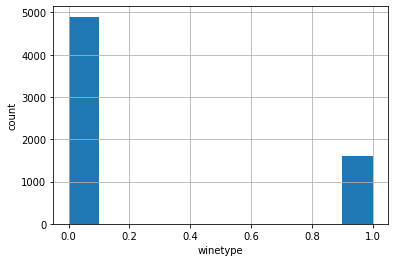

In [ ]:
from matplotlib import pyplot as plt

df2['winetype'].hist()
plt.xlabel('winetype')
plt.ylabel('count')

Text(0, 0.5, 'count')

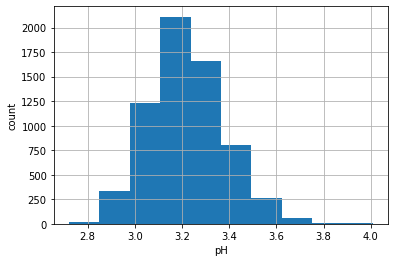

In [ ]:
df2['pH'].hist()
plt.xlabel('pH')
plt.ylabel('count')

Text(0, 0.5, 'count')

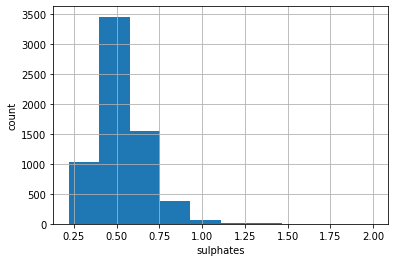

In [ ]:
df2['sulphates'].hist()
plt.xlabel('sulphates')
plt.ylabel('count')

Text(0, 0.5, 'count')

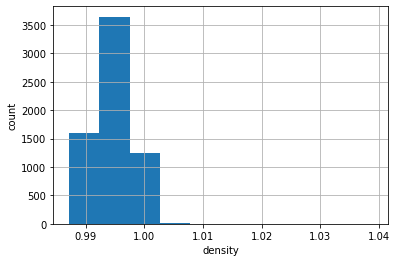

In [ ]:
df2['density'].hist()
plt.xlabel('density')
plt.ylabel('count')

2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

Logistic Regression

In [ ]:
#split data
from sklearn.model_selection import train_test_split
y = df2['winetype']
X = df2.drop('winetype', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.981
Test set score: 0.980


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#logistic regression with StandrdScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg.score(X_test_scaled, y_test)
print("Training set score: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(logreg.coef_ != 0)))

print(X_train.columns)
print("logreg.coef_: {}".format(logreg.coef_))

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(logreg, X_train_scaled, y_train)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Training set score: 0.87
Test set score: 0.87
Number of features used: 12
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg.coef_: [[ 0.8894267  14.2982338  -2.92348641 -0.25495735  2.27604653  0.08199994
  -0.08091229 -2.84880115  1.07798391 11.68460438 -0.90814411 -0.16705995]]
0.993637234770705


In [ ]:
logreg = LogisticRegression(penalty='l2').fit(X_train_scaled, y_train)

print(X_train.columns)
print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(logreg, X_train_scaled, y_train)))#penalized logistic regression
logreg = LogisticRegression(penalty='l2').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg .coef_: [[ 0.48343314  1.27298564 -0.4505842  -3.68781693  0.86509071  1.03231982
  -3.11480786  3.43785648  0.34711192  0.63618944  1.141465    0.27294128]]
Training set score: 0.994
Test set score: 0.993
0.9926111725372506
Training set score: 0.981
Test set score: 0.975


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#penalized logistic regression w StandardScaler
logreg = LogisticRegression(penalty='l2').fit(X_train_scaled, y_train)

print(X_train.columns)
print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(logreg, X_train_scaled, y_train)))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg .coef_: [[ 0.48343314  1.27298564 -0.4505842  -3.68781693  0.86509071  1.03231982
  -3.11480786  3.43785648  0.34711192  0.63618944  1.141465    0.27294128]]
Training set score: 0.994
Test set score: 0.993
0.9926111725372506


KNN

In [ ]:
# KNN without StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Print accuracy
print("accuracy: "+str(knn.score(X_test, y_test)))

accuracy: 0.936


In [ ]:
# KNN w StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(knn, X_train_scaled, y_train)))

0.9922002843152742


The results are different. In Knn, StandardScaler increases the score from 0.936 to 0.992. For logistic regression, StandardScaler decreases the score from 0.98 to 0.87. For penalized logistic regression, StandardScaler increases the score from 0.975 to 0.993.



2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
#Tune penalized logistic regression with GridSearchCV
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg_pipe, param_grid)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))


{'logisticregression__C': 10}
0.9926153846153846


In [ ]:
logreg = LogisticRegression(C = 10, penalty='l2').fit(X_train_scaled, y_train)

print(X_train.columns)
print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

# cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(logreg, X_train_scaled, y_train)))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg .coef_: [[-0.09559573  1.1993927  -0.56684452 -5.58927435  0.84357158  1.55376075
  -3.63329034  5.28644784 -0.15761224  0.50297522  2.00912742  0.30480961]]
Training set score: 0.994
Test set score: 0.993
0.993637234770705


In [ ]:
#Tune KNN with GridSearchCV
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

{'kneighborsclassifier__n_neighbors': 2}
0.9907692307692307


GridSearch improves the result of Knn to 0.993. Score of penalized logistic regression produced by GridSearch is slightly lower, it is 0.991.



2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [ ]:
#logistic regression to "StratifiedKFold"
from sklearn.model_selection import StratifiedKFold
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg_pipe, param_grid, cv=StratifiedKFold().split(X_train_scaled, y_train))
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

{'logisticregression__C': 0.001}
0.7372307692307692


In [ ]:
#logistic regression to "KFold"
from sklearn.model_selection import KFold
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg_pipe, param_grid, cv=KFold(shuffle=True))
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

{'logisticregression__C': 0.001}
0.7372307692307692


Changing the strategy from ‘stratified k-fold’ to ‘k-fold’ with shuffling doesn’t change the parameters, but changing from a random state of 42 to 12 changes C from 10 to 0.001.



2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

 The coefficients in logistic regression and penalized logistic regression are really different. Some of the coefficients in LR are extremely large. In logistic regression (LR), volatile acidity has a size of 14.30, which is different from penalty logistic regression (PLR), the largest coefficient is -3.69 (residual sugar). Sulphates has a coefficient of 11.685 in LR, while in PLR the coefficient is 0.636. Coefficients in both models are not ordered in the same way.  For example, citric acid has the third largest coefficient in LR (-2.923), yet, in PLR its size is more toward the end of the list (-0.451). Density is the fourth largest coefficient (-2.92) in LR and second largest coefficient (3.44) in PLR. Total surfer dioxide is the third largest (-3.11) in PLR, while it has the smallest coefficient in LR (-0.081).

I choose penalized logistic regression because it has regularization and  limits the impact of each feature on the outcome, which prevents overfitting. Not to say that the accuracy of penalized logistic regression is in general higher than logistic regression.
